In [266]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, multilabel_confusion_matrix
from scipy.stats import chi2_contingency

In [267]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<h3> Loading data </h3>

In [268]:
csv_files = ["KCPD_Crime_Data_Cleaned.csv"]
list_df = []

for file in csv_files:
    list_df.append(pd.read_csv("Data/"+file))
    
crimes = pd.concat(list_df)

In [269]:
crimes.head(100)

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Location,Offense_Cleaned,Firearm_Flag,Age_Categorical,Reported_Date_Time,From_Date_Time,Reported_Date_Time:year,Reported_Date_Time:month,Reported_Date_Time:day,Reported_Date_Time:day_of_week,Reported_Date_Time:hour,Reported_Date_Time:hour_part
0,KC19024462,04/04/2019,14:09,04/04/2019,14:07,04/04/2019,14:09,Stealing – Shoplift,23C,Shoplifting,241,3700 E GREGORY BLVD,KANSAS CITY,64132.0,PJ5365,MPD,N,ARR CHA SUS,Black,M,45.0,NaN,Theft,0.0,26-50 years,2019-04-04 14:09:00,2019-04-04 14:07:00,2019,April,4,Thursday,14,afternoon
1,KC19024953,04/06/2019,9:19,04/06/2019,6:35,04/06/2019,6:35,Property Damage,23H,All Other Larceny,636,11200 210 HWY,KANSAS CITY,64161.0,NaN,SCP,N,VIC,Unknown,M,38.0,NaN,Vandalism,0.0,26-50 years,2019-04-06 09:19:00,2019-04-06 06:35:00,2019,April,6,Saturday,9,late morning
2,KC19024923,04/06/2019,3:27,04/06/2019,3:27,04/06/2019,4:00,Eluding / Resisting a Lawful Stop,NaN,NaN,315,NORLEDGE AVE and N OAKLEY AVE,KANSAS CITY,64123.0,PJ0243,EPD,N,SUS,White,F,28.0,NaN,Other Offenses,0.0,26-50 years,2019-04-06 03:27:00,2019-04-06 03:27:00,2019,April,6,Saturday,3,midnight
3,KC19031307,04/29/2019,19:42,04/29/2019,19:30,04/29/2019,20:10,Stealing – Shoplift,23C,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-29 19:42:00,2019-04-29 19:30:00,2019,April,29,Monday,19,evening
4,KC19029070,04/21/2019,12:00,04/21/2019,12:00,04/21/2019,12:00,Stealing – Shoplift,23C,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-21 12:00:00,2019-04-21 12:00:00,2019,April,21,Sunday,12,noon
5,KC19025440,04/08/2019,13:42,04/02/2019,12:05,04/02/2019,12:05,Recovered Property,NaN,NaN,113,900 E 21ST ST,KANSAS CITY,64108.0,PJ1725,CPD,N,VIC,White,M,38.0,NaN,Vandalism,0.0,26-50 years,2019-04-08 13:42:00,2019-04-02 12:05:00,2019,April,8,Monday,13,noon
6,KC19024783,04/05/2019,16:17,04/05/2019,16:10,04/05/2019,16:10,Trespass of Real Property,90G,Liquor Law Violations,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,ARR CHA SUS,Black,M,59.0,NaN,Vandalism,0.0,51-75 years,2019-04-05 16:17:00,2019-04-05 16:10:00,2019,April,5,Friday,16,afternoon
7,KC19025358,04/08/2019,7:29,04/05/2019,18:00,04/08/2019,7:29,Stolen Auto,240,Motor Vehicle Theft,414,8300 N GREEN HILLS RD,KANSAS CITY,64151.0,PP0367,NPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-08 07:29:00,2019-04-05 18:00:00,2019,April,8,Monday,7,early morning
8,KC19033370,05/07/2019,6:54,05/07/2019,7:50,05/07/2019,9:00,Endangering the Welfare of a Child,90F,"Family Offenses, Nonviolent",213,6300 MANCHESTER AVE,KANSAS CITY,64129.0,NaN,MPD,Y,ARR CHA,Black,F,30.0,NaN,Other Offenses,1.0,26-50 years,2019-05-07 06:54:00,2019-05-07 07:50:00,2019,May,7,Tuesday,6,early morning
9,KC19032362,05/03/2019,11:47,04/24/2019,12:00,04/25/2019,12:00,Identity Theft,26F,Identity Theft,132,00 W 36TH ST,KANSAS CITY,64111.0,NaN,CPD,N,VIC,White,M,59.0,NaN,Theft,0.0,51-75 years,2019-05-03 11:47:00,2019-04-24 12:00:00,2019,May,3,Friday,11,noon


<h3> Dropping columns we won't need </h3>

In [270]:
crimes = crimes.drop(['Report_No','IBRS','Description','Rep_Dist','To_Date','To_Time','Address'\
                    ,'Reported_Date', 'Reported_Time', 'From_Date', 'From_Time', 'Beat', 'Reported_Date_Time'\
                    , 'From_Date_Time', 'Reported_Date_Time:hour', 'Reported_Date_Time:day'\
                    ,'Offense','Involvement','City','Zip Code','Location', 'Age'], axis=1)

In [271]:
crimes.head()

,Area,DVFlag,Race,Sex,Offense_Cleaned,Firearm_Flag,Age_Categorical,Reported_Date_Time:year,Reported_Date_Time:month,Reported_Date_Time:day_of_week,Reported_Date_Time:hour_part
0,MPD,N,Black,M,Theft,0.0,26-50 years,2019,April,Thursday,afternoon
1,SCP,N,Unknown,M,Vandalism,0.0,26-50 years,2019,April,Saturday,late morning
2,EPD,N,White,F,Other Offenses,0.0,26-50 years,2019,April,Saturday,midnight
3,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Monday,evening
4,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Sunday,noon


In [272]:
# Cross tabulation between GENDER and APPROVE_LOAN
# CrosstabResult=pd.crosstab(index=crimes['Sex'],columns=crimes['Age_Categorical'])
# print(CrosstabResult)

# ChiSqResult = chi2_contingency(CrosstabResult)
# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)
# print('The P-Value of the ChiSq Test is: {:.2f}'.format(ChiSqResult[1]))

In [273]:
crimes.head()

,Area,DVFlag,Race,Sex,Offense_Cleaned,Firearm_Flag,Age_Categorical,Reported_Date_Time:year,Reported_Date_Time:month,Reported_Date_Time:day_of_week,Reported_Date_Time:hour_part
0,MPD,N,Black,M,Theft,0.0,26-50 years,2019,April,Thursday,afternoon
1,SCP,N,Unknown,M,Vandalism,0.0,26-50 years,2019,April,Saturday,late morning
2,EPD,N,White,F,Other Offenses,0.0,26-50 years,2019,April,Saturday,midnight
3,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Monday,evening
4,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Sunday,noon


In [274]:
crimes.dtypes

Area                               object
DVFlag                             object
Race                               object
Sex                                object
Offense_Cleaned                    object
Firearm_Flag                      float64
Age_Categorical                    object
Reported_Date_Time:year             int64
Reported_Date_Time:month           object
Reported_Date_Time:day_of_week     object
Reported_Date_Time:hour_part       object
dtype: object

<h3> One-hot Encoding </h3>

In [191]:
crimes = pd.concat([crimes, pd.get_dummies(crimes["Area"],prefix="Area")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["DVFlag"],prefix="DVFlag")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Race"],prefix="Race")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Sex"],prefix="Sex")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Age_Categorical"],prefix="Age_Categorical")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Firearm_Flag"],prefix="Firearm_Flag")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Reported_Date_Time:year"],prefix="Reported_Date_Time:year")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Reported_Date_Time:month"],prefix="Reported_Date_Time:month")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Reported_Date_Time:day_of_week"],prefix="Reported_Date_Time:day_of_week")], axis=1)
crimes = pd.concat([crimes, pd.get_dummies(crimes["Reported_Date_Time:hour_part"],prefix="Reported_Date_Time:hour_part")], axis=1)
crimes.head()

,Area,DVFlag,Race,Sex,Offense_Cleaned,Firearm_Flag,Age_Categorical,Reported_Date_Time:year,Reported_Date_Time:month,Reported_Date_Time:day_of_week,Reported_Date_Time:hour_part,Area_CPD,Area_EPD,Area_MPD,Area_NPD,Area_OSPD,Area_PD1,Area_SCP,Area_SCPD,Area_SPD,DVFlag_N,DVFlag_U,DVFlag_Y,Race_American Indian,Race_Black,Race_Unknown,Race_White,Sex_F,Sex_M,Sex_U,Age_Categorical_0-25 years,Age_Categorical_26-50 years,Age_Categorical_51-75 years,Age_Categorical_76-99 years,Firearm_Flag_0.0,Firearm_Flag_1.0,Reported_Date_Time:year_2019,Reported_Date_Time:year_2020,Reported_Date_Time:month_April,Reported_Date_Time:month_August,Reported_Date_Time:month_December,Reported_Date_Time:month_February,Reported_Date_Time:month_January,Reported_Date_Time:month_July,Reported_Date_Time:month_June,Reported_Date_Time:month_March,Reported_Date_Time:month_May,Reported_Date_Time:month_November,Reported_Date_Time:month_October,Reported_Date_Time:month_September,Reported_Date_Time:day_of_week_Friday,Reported_Date_Time:day_of_week_Monday,Reported_Date_Time:day_of_week_Saturday,Reported_Date_Time:day_of_week_Sunday,Reported_Date_Time:day_of_week_Thursday,Reported_Date_Time:day_of_week_Tuesday,Reported_Date_Time:day_of_week_Wednesday,Reported_Date_Time:hour_part_afternoon,Reported_Date_Time:hour_part_dawn,Reported_Date_Time:hour_part_early morning,Reported_Date_Time:hour_part_evening,Reported_Date_Time:hour_part_late morning,Reported_Date_Time:hour_part_midnight,Reported_Date_Time:hour_part_night,Reported_Date_Time:hour_part_noon
0,MPD,N,Black,M,Theft,0.0,26-50 years,2019,April,Thursday,afternoon,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,SCP,N,Unknown,M,Vandalism,0.0,26-50 years,2019,April,Saturday,late morning,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,EPD,N,White,F,Other Offenses,0.0,26-50 years,2019,April,Saturday,midnight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Monday,evening,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,EPD,N,Unknown,U,Theft,0.0,26-50 years,2019,April,Sunday,noon,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [192]:
crimes = crimes.drop(['Area', 'DVFlag', 'Race', 'Sex', 'Age_Categorical', 'Firearm_Flag', 'Reported_Date_Time:year'\
                      ,'Reported_Date_Time:month','Reported_Date_Time:day_of_week','Reported_Date_Time:hour_part']\
                     , axis=1)

crimes.head()

,Offense_Cleaned,Area_CPD,Area_EPD,Area_MPD,Area_NPD,Area_OSPD,Area_PD1,Area_SCP,Area_SCPD,Area_SPD,DVFlag_N,DVFlag_U,DVFlag_Y,Race_American Indian,Race_Black,Race_Unknown,Race_White,Sex_F,Sex_M,Sex_U,Age_Categorical_0-25 years,Age_Categorical_26-50 years,Age_Categorical_51-75 years,Age_Categorical_76-99 years,Firearm_Flag_0.0,Firearm_Flag_1.0,Reported_Date_Time:year_2019,Reported_Date_Time:year_2020,Reported_Date_Time:month_April,Reported_Date_Time:month_August,Reported_Date_Time:month_December,Reported_Date_Time:month_February,Reported_Date_Time:month_January,Reported_Date_Time:month_July,Reported_Date_Time:month_June,Reported_Date_Time:month_March,Reported_Date_Time:month_May,Reported_Date_Time:month_November,Reported_Date_Time:month_October,Reported_Date_Time:month_September,Reported_Date_Time:day_of_week_Friday,Reported_Date_Time:day_of_week_Monday,Reported_Date_Time:day_of_week_Saturday,Reported_Date_Time:day_of_week_Sunday,Reported_Date_Time:day_of_week_Thursday,Reported_Date_Time:day_of_week_Tuesday,Reported_Date_Time:day_of_week_Wednesday,Reported_Date_Time:hour_part_afternoon,Reported_Date_Time:hour_part_dawn,Reported_Date_Time:hour_part_early morning,Reported_Date_Time:hour_part_evening,Reported_Date_Time:hour_part_late morning,Reported_Date_Time:hour_part_midnight,Reported_Date_Time:hour_part_night,Reported_Date_Time:hour_part_noon
0,Theft,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,Vandalism,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,Other Offenses,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Theft,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Theft,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [193]:
# 5           Theft  13400
# 2  Other Offenses   4090
# 0         Assault   2851
# 6       Vandalism   2678
# 1        Burglary   2157
# 4         Robbery    541
# 3            Rape    317

crimes['Offense_Encoded'] = crimes['Offense_Cleaned'].map({'Assault' :0, 'Burglary' :1,\
                                                           'Other Offenses' :2, 'Rape':3,\
                                                            'Robbery':4,'Theft':5,\
                                                           'Vandalism':6}).astype(int) #mapping numbers
crimes = crimes.drop(['Offense_Cleaned'], axis=1)
crimes.head()

,Area_CPD,Area_EPD,Area_MPD,Area_NPD,Area_OSPD,Area_PD1,Area_SCP,Area_SCPD,Area_SPD,DVFlag_N,DVFlag_U,DVFlag_Y,Race_American Indian,Race_Black,Race_Unknown,Race_White,Sex_F,Sex_M,Sex_U,Age_Categorical_0-25 years,Age_Categorical_26-50 years,Age_Categorical_51-75 years,Age_Categorical_76-99 years,Firearm_Flag_0.0,Firearm_Flag_1.0,Reported_Date_Time:year_2019,Reported_Date_Time:year_2020,Reported_Date_Time:month_April,Reported_Date_Time:month_August,Reported_Date_Time:month_December,Reported_Date_Time:month_February,Reported_Date_Time:month_January,Reported_Date_Time:month_July,Reported_Date_Time:month_June,Reported_Date_Time:month_March,Reported_Date_Time:month_May,Reported_Date_Time:month_November,Reported_Date_Time:month_October,Reported_Date_Time:month_September,Reported_Date_Time:day_of_week_Friday,Reported_Date_Time:day_of_week_Monday,Reported_Date_Time:day_of_week_Saturday,Reported_Date_Time:day_of_week_Sunday,Reported_Date_Time:day_of_week_Thursday,Reported_Date_Time:day_of_week_Tuesday,Reported_Date_Time:day_of_week_Wednesday,Reported_Date_Time:hour_part_afternoon,Reported_Date_Time:hour_part_dawn,Reported_Date_Time:hour_part_early morning,Reported_Date_Time:hour_part_evening,Reported_Date_Time:hour_part_late morning,Reported_Date_Time:hour_part_midnight,Reported_Date_Time:hour_part_night,Reported_Date_Time:hour_part_noon,Offense_Encoded
0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,6
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5


In [175]:
# plt.figure(figsize=(20,10))
# sns.heatmap(crimes[['Sex_F','Sex_M','Sex_U','Age_Categorical_0-25 years','Age_Categorical_26-50 years','Age_Categorical_51-75 years','Age_Categorical_76-99 years']].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
# plt.figure(figsize=(31,29))
# sns.heatmap(crimes.corr(),cmap="YlGnBu", linewidth=0.3, cbar_kws={"shrink": .8},annot=True, fmt='g')
# plt.yticks(rotation=0);

In [194]:
x_data = crimes.drop(['Offense_Encoded'],axis=1)
y_data = crimes['Offense_Encoded']

x_train, x_test, y_train, y_test = train_test_split(crimes, y_data,test_size=0.2, random_state = 1)

In [195]:
print(x_train.shape)
print(y_train.shape)

(20676, 55)
(20676,)


In [196]:
print(x_test.shape)
print(y_test.shape)

(5169, 55)
(5169,)


In [203]:
k = 4 
knn_clf=KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test)

In [198]:
ypred

array([5, 2, 0, ..., 2, 5, 5])

In [253]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 520   30    0    0    0    0    0]
 [  15  319   52    0    0    0    0]
 [   0   26  798    0    0    0    0]
 [   0    0   43   15    0    0    0]
 [   0    0    0    1   42   65    0]
 [   0    0    0    0    0 2703    0]
 [   0    0    0    0    0  311  229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       550
           1       0.85      0.83      0.84       386
           2       0.89      0.97      0.93       824
           3       0.94      0.26      0.41        58
           4       1.00      0.39      0.56       108
           5       0.88      1.00      0.93      2703
           6       1.00      0.42      0.60       540

    accuracy                           0.89      5169
   macro avg       0.93      0.69      0.75      5169
weighted avg       0.90      0.89      0.88      5169

Accuracy: 0.8949506674405108


Minimum error: 0.09885857999613078 at K = 12


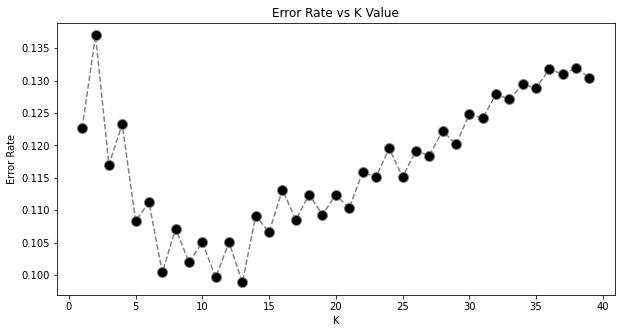

In [217]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='grey', linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [262]:
# 5           Theft  13400
# 2  Other Offenses   4090
# 0         Assault   2851
# 6       Vandalism   2678
# 1        Burglary   2157
# 4         Robbery    541
# 3            Rape    317
k = 12 
knn_clf=KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(x_train,y_train)
ypred=knn_clf.predict(x_test)

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 520   30    0    0    0    0    0]
 [  15  319   52    0    0    0    0]
 [   0   26  798    0    0    0    0]
 [   0    0   43   15    0    0    0]
 [   0    0    0    1   42   65    0]
 [   0    0    0    0    0 2703    0]
 [   0    0    0    0    0  311  229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       550
           1       0.85      0.83      0.84       386
           2       0.89      0.97      0.93       824
           3       0.94      0.26      0.41        58
           4       1.00      0.39      0.56       108
           5       0.88      1.00      0.93      2703
           6       1.00      0.42      0.60       540

    accuracy                           0.89      5169
   macro avg       0.93      0.69      0.75      5169
weighted avg       0.90      0.89      0.88      5169

Accuracy: 0.8949506674405108


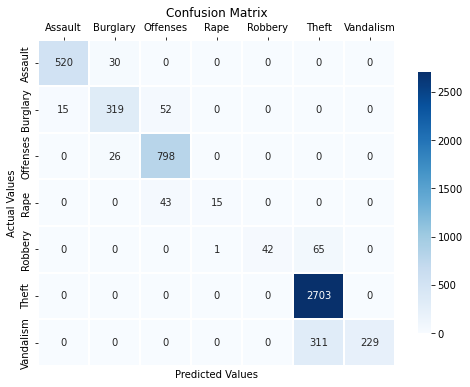

In [263]:
# 5           Theft  13400
# 2  Other Offenses   4090
# 0         Assault   2851
# 6       Vandalism   2678
# 1        Burglary   2157
# 4         Robbery    541
# 3            Rape    317
cm = confusion_matrix(y_test, ypred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Assault','Burglary','Offenses','Rape','Robbery','Theft','Vandalism'], 
                     columns = ['Assault','Burglary','Offenses','Rape','Robbery','Theft','Vandalism'])

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8},annot=True, fmt='g').xaxis.tick_top()
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

<h3> Random Forest </h3>

In [75]:
x_data = crimes.drop(['Offense_Encoded'],axis=1)
y_data = crimes['Offense_Encoded']

x_train, x_test, y_train, y_test = train_test_split(crimes, y_data,test_size=0.2, random_state = 1)

model = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True)
model.fit(x_train,y_train)
ypred = model.predict(x_test)

In [76]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)

result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 539   11    0    0    0    0    0]
 [   2  382    2    0    0    0    0]
 [   0    0  824    0    0    0    0]
 [   0    0   20   37    1    0    0]
 [   0    0   23    4   81    0    0]
 [   0    0    0    0    3 2699    1]
 [   0    0    0    0    0    1  539]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       550
           1       0.97      0.99      0.98       386
           2       0.95      1.00      0.97       824
           3       0.90      0.64      0.75        58
           4       0.95      0.75      0.84       108
           5       1.00      1.00      1.00      2703
           6       1.00      1.00      1.00       540

    accuracy                           0.99      5169
   macro avg       0.97      0.91      0.93      5169
weighted avg       0.99      0.99      0.99      5169

Accuracy: 0.9868446508028632
